<a href="https://colab.research.google.com/github/JajoriaYogesh04/data-driven-analysis-of-fluid-flows-/blob/main/G14_Fluid_Mechanics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MEL2040 Project**
# **Data-Driven Analysis of Fluid Flows**

YOGESH JAJORIA(B22ME073)

SACHIN CHOUDHARY(B22ME056)


## **3. Proper Orthogonal Decomposition**

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

### **3.1. Image Generation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
video_path = '/content/drive/MyDrive/FM Project/3CYL_Flow.mp4'

# Create a video capture object
cap = cv2.VideoCapture(video_path)

# List to store the frames
frames = []

# Check if video is opened successfully
if not cap.isOpened():
  print("Error opening video!")
  exit()

# Process each frame of the video
while True:
  # Capture frame-by-frame
  ret, frame = cap.read()

  # If the frame is read correctly retrieve it
  if ret:
    frames.append(frame)
  # Break the loop if there are no more frames to read
  else:
    break

# Release the video capture object
cap.release()

# Print the total number of frames captured
print(f"Total frames captured: {len(frames)}")

Total frames captured: 751


In [ ]:
# Import cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow
# Define a function to display an image with a delay, resizing, and grayscale conversion
def show_image(frame, delay=1, resize_factor=0.2):
  height, width = frame.shape[:2]  # Get original height and width
  new_height = int(height * resize_factor)
  new_width = int(width * resize_factor)
  resized_frame = cv2.resize(frame, (new_width, new_height))
  # Convert to grayscale
  gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
  print(gray_frame)
  print(gray_frame.shape)
  # print(len(gray_frame))
# Loop through each frame in the list
for frame in frames:
  show_image(frame)

Streaming output truncated to the last 5000 lines.
[[225 224 223 ... 203 203 202]
 [224 224 224 ... 220 220 220]
 [225 224 224 ... 219 219 222]
 ...
 [225 225 225 ... 220 220 220]
 [225 225 225 ... 213 213 213]
 [221 221 221 ... 195 195 195]]
(141, 311)
[[225 224 223 ... 203 203 202]
 [224 224 224 ... 220 220 220]
 [225 224 224 ... 219 219 222]
 ...
 [225 225 225 ... 220 220 220]
 [225 225 225 ... 213 213 213]
 [221 221 221 ... 195 195 195]]
(141, 311)
[[225 224 223 ... 203 203 202]
 [224 224 224 ... 220 220 220]
 [225 224 224 ... 219 219 222]
 ...
 [225 225 225 ... 220 220 220]
 [225 225 225 ... 213 213 213]
 [221 220 221 ... 195 195 195]]
(141, 311)
[[225 224 223 ... 203 203 202]
 [224 224 224 ... 220 220 220]
 [225 224 224 ... 218 218 222]
 ...
 [225 225 225 ... 220 220 220]
 [225 225 225 ... 213 213 213]
 [221 220 221 ... 195 195 195]]
(141, 311)
[[225 224 223 ... 203 203 202]
 [224 224 224 ... 220 220 220]
 [225 224 224 ... 219 219 221]
 ...
 [225 225 225 ... 220 220 220]
 [225 22

### **3.2. Execute POD**

In [ ]:
def preprocess_image(frame, resize_factor=0.2):
    # Resize the image
    height, width = frame.shape[:2]
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    resized_frame = cv2.resize(frame, (new_width, new_height))
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    return gray_frame
# Load and preprocess each image, and stack them into a numpy array
stacked_images = []
for frame in frames:
    preprocessed_frame = preprocess_image(frame)
    stacked_images.append(preprocessed_frame)
# Convert the list of images into a numpy array
stacked_images_array = np.array(stacked_images)
print(stacked_images_array.shape)

(751, 141, 311)


In [ ]:
mean_image = np.mean(stacked_images_array, axis=0)
print("Mean image:", mean_image)
print("Mean image shape:", mean_image.shape)

Mean image: [[224.26764314 224.09320905 223.78561917 ... 202.26098535 202.27696405
  202.37549933]
 [224.78961385 224.82556591 224.87083888 ... 219.47936085 219.43275632
  219.03595206]
 [224.23302264 224.04527297 224.04527297 ... 219.04394141 218.88548602
  219.28894807]
 ...
 [224.76031957 224.76031957 224.76031957 ... 220.66045273 220.65113182
  220.77363515]
 [224.76031957 224.76031957 224.76031957 ... 213.43541944 213.43142477
  213.5539281 ]
 [221.98002663 221.8575233  222.01464714 ... 197.90013316 197.82023968
  197.78029294]]
Mean image shape: (141, 311)


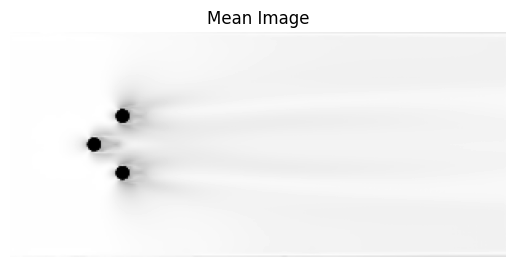

In [ ]:
# Calculate the mean of the stacked images
mean_image = np.mean(stacked_images_array, axis=0)
# Display the mean image using matplotlib.pyplot
plt.imshow(mean_image, cmap='gray')
plt.title('Mean Image')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
mean_subtracted_images = stacked_images - mean_image
print(mean_subtracted_images)
print(mean_subtracted_images.shape)

[[[-1.26764314e+00 -1.09320905e+00 -7.85619174e-01 ...  2.17390146e+01
    2.17230360e+01  2.26245007e+01]
  [-7.89613848e-01 -8.25565912e-01 -8.70838881e-01 ...  4.52063915e+00
    4.56724368e+00  4.96404794e+00]
  [-1.23302264e+00 -1.04527297e+00 -1.04527297e+00 ...  4.95605859e+00
    5.11451398e+00  5.71105193e+00]
  ...
  [-7.60319574e-01 -7.60319574e-01 -7.60319574e-01 ...  4.33954727e+00
    4.34886818e+00  4.22636485e+00]
  [-7.60319574e-01 -7.60319574e-01 -7.60319574e-01 ...  1.15645806e+01
    1.15685752e+01  1.14460719e+01]
  [ 1.01997337e+00  1.14247670e+00  9.85352863e-01 ...  2.00998668e+01
    2.01797603e+01  2.12197071e+01]]

 [[ 7.32356858e-01  9.06790945e-01  1.21438083e+00 ...  2.17390146e+01
    2.17230360e+01  2.16245007e+01]
  [ 2.10386152e-01  1.74434088e-01  1.29161119e-01 ...  5.52063915e+00
    5.56724368e+00  5.96404794e+00]
  [ 7.66977364e-01  9.54727031e-01  9.54727031e-01 ...  5.95605859e+00
    6.11451398e+00  5.71105193e+00]
  ...
  [-7.60319574e-01 -7.6

In [ ]:
# Reshape the mean-subtracted images into a 2D matrix for SVD
num_images, height, width = mean_subtracted_images.shape
mean_subtracted_images_2d = mean_subtracted_images.reshape(num_images, height * width)
# Apply Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(mean_subtracted_images_2d, full_matrices=False)
# U: Left singular vectors (eigenmodes) represent the dominant spatial patterns of variation.
# S: Singular values represent the variance captured by each eigenmode.
# Vt: Transpose of right singular vectors (not typically used in POD).
# Print the shapes of the matrices
print(U)
print("U shape:", U.shape)
print(S)
print("S shape:", S.shape)
print(Vt)
print("Vt shape:", Vt.shape)

[[-0.00224317 -0.02397278  0.10697059 ... -0.00582843 -0.00096373
  -0.03649052]
 [-0.00228032 -0.02373973  0.10655252 ...  0.01553848  0.00262061
  -0.03649052]
 [-0.00275472 -0.02407901  0.10690465 ... -0.02217875  0.00711507
  -0.03649052]
 ...
 [-0.05780119 -0.01551507 -0.01615421 ... -0.00015087 -0.00026455
  -0.03649052]
 [-0.05539142  0.0286003  -0.01336585 ... -0.00269699  0.00585732
  -0.03649052]
 [-0.02356097  0.06054053 -0.00676428 ...  0.00072363 -0.00043785
  -0.03649052]]
U shape: (751, 751)
[1.34983427e+04 1.26000384e+04 1.18763593e+04 1.00540937e+04
 9.48977232e+03 9.06292518e+03 8.54114454e+03 8.23660228e+03
 8.08414543e+03 7.49646349e+03 6.85401524e+03 6.71077853e+03
 6.69788900e+03 6.52726192e+03 6.36380969e+03 6.17379874e+03
 6.00260194e+03 5.62769476e+03 5.45461965e+03 5.26168608e+03
 5.19210932e+03 4.91544900e+03 4.70372925e+03 4.59879671e+03
 4.41114158e+03 4.37341227e+03 4.18754580e+03 4.14411284e+03
 3.98482834e+03 3.82256135e+03 3.59376262e+03 3.53995310e+03


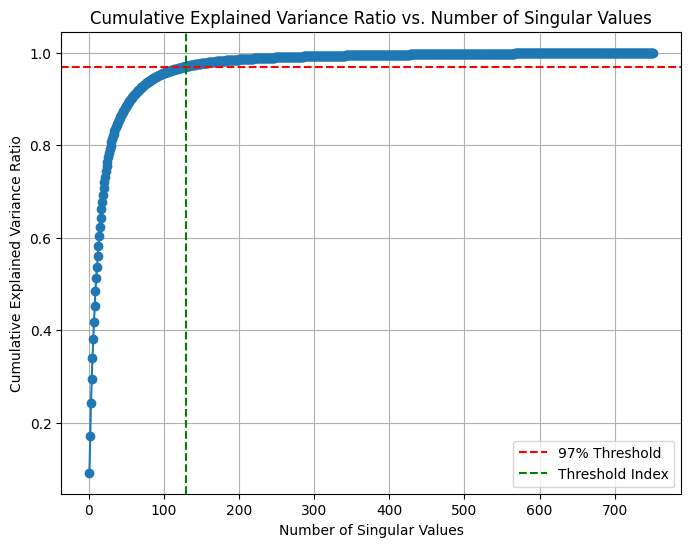

In [ ]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio = (S ** 2) / np.sum(S ** 2)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# Find the index where cumulative explained variance ratio exceeds 97%
threshold_index = np.argmax(cumulative_variance_ratio >= 0.97) + 1
# Plot the cumulative explained variance ratio vs. the number of singular values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.97, color='r', linestyle='--', label='97% Threshold')  # Horizontal line for 97% threshold
plt.axvline(x=threshold_index, color='g', linestyle='--', label='Threshold Index')  # Vertical line for threshold index
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Singular Values')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

### **3.3. Analyses POD Modes**

In [ ]:
# Find the indices of the top modes (corresponding to the top singular values)
top_modes_indices = np.argsort(S)[::-1][:10]
# Extract the top modes from the left singular vectors (U)
top_modes = U[:, top_modes_indices]
# Print the indices of the top modes and their corresponding singular values
print("Indices of the top modes:", top_modes_indices)
print("Top modes:\n", top_modes)

Indices of the top modes: [0 1 2 3 4 5 6 7 8 9]
Top modes:
 [[-2.24316781e-03 -2.39727826e-02  1.06970595e-01 ... -2.94653017e-03
   1.99056441e-02 -3.64106720e-05]
 [-2.28031674e-03 -2.37397318e-02  1.06552522e-01 ... -2.76918687e-03
   1.97397634e-02 -4.26735947e-04]
 [-2.75471598e-03 -2.40790123e-02  1.06904653e-01 ... -3.01636245e-03
   2.00073676e-02 -1.27479835e-03]
 ...
 [-5.78011930e-02 -1.55150727e-02 -1.61542063e-02 ...  3.78834107e-02
  -3.71931330e-02  5.11850429e-03]
 [-5.53914186e-02  2.86003008e-02 -1.33658535e-02 ...  5.13721546e-02
  -2.00492940e-02  1.17469519e-02]
 [-2.35609695e-02  6.05405346e-02 -6.76427933e-03 ...  6.63592403e-02
  -2.37984151e-03  1.16334980e-02]]


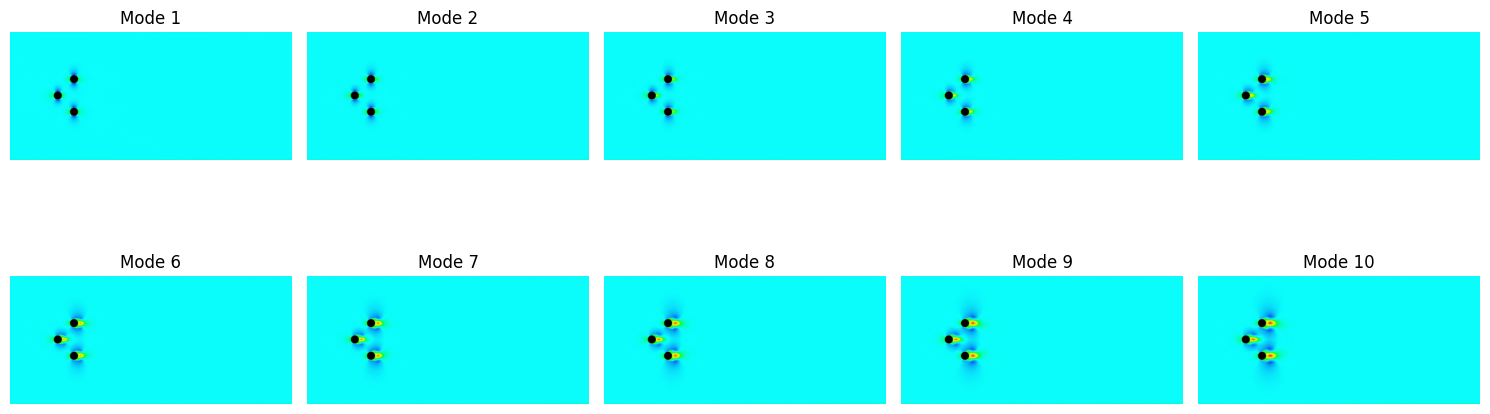

In [ ]:
# Define the number of rows and columns for displaying the top modes
num_rows = 2
num_columns = 5
# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6))
# Flatten the axes array for easier iteration
axes = axes.flatten()
# Loop through the top modes and display each image
for i, mode_index in enumerate(top_modes_indices):
    mode_image = frames[mode_index]  # Get the original image corresponding to the mode
    axes[i].imshow(mode_image)  # Display the image
    axes[i].set_title(f"Mode {i+1}")  # Set the title for the subplot
    axes[i].axis('off')  # Turn off axis ticks and labels
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Extract the singular values corresponding to the top modes
top_singular_values = S[top_modes_indices]
# Calculate the total energy (sum of squared singular values)
total_energy = np.sum(S ** 2)
# Calculate the energy contribution percentage of each top mode
energy_contribution_percentage_top_modes = explained_variance_ratio[:10] * 100
# Print the energy contribution percentage of the top 10 modes
print("Energy contribution percentage of the top 10 modes:")
for i, energy_contribution_percentage in enumerate(energy_contribution_percentage_top_modes, start=1):
    print(f"Mode {i}: {energy_contribution_percentage:.7f}%")

Energy contribution percentage of the top 10 modes:
Mode 1: 9.1903178%
Mode 2: 8.0078028%
Mode 3: 7.1143673%
Mode 4: 5.0986534%
Mode 5: 4.5423565%
Mode 6: 4.1429188%
Mode 7: 3.6796099%
Mode 8: 3.4218883%
Mode 9: 3.2963845%
Mode 10: 2.8345394%


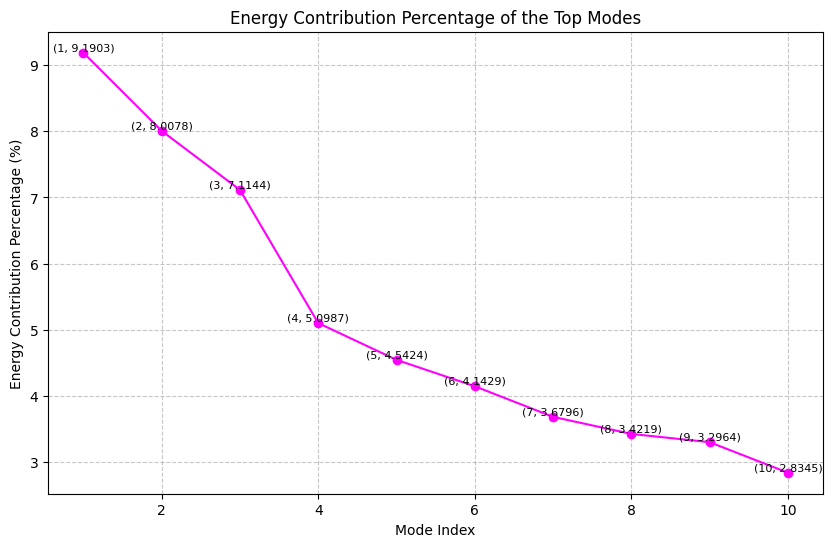

In [ ]:
# Generate x-axis values (mode indices)
x_values = np.arange(1, len(energy_contribution_percentage_top_modes) + 1)
# Plot the energy contribution percentage of the top modes as a line chart
plt.figure(figsize=(10, 6))
plt.plot(x_values, energy_contribution_percentage_top_modes, color='magenta', marker='o', linestyle='-')
plt.xlabel('Mode Index')
plt.ylabel('Energy Contribution Percentage (%)')
plt.title('Energy Contribution Percentage of the Top Modes')
plt.grid(True, linestyle='--', alpha=0.7)
# Print and mark coordinates of each point
for x, y in zip(x_values, energy_contribution_percentage_top_modes):
    plt.text(x, y, f'({x}, {y:.4f})', ha='center', va='bottom', fontsize=8)
plt.show()

## **4. Noise!**

### **4.1. Adding Gaussian Noise**

In [ ]:
import numpy as np
import cv2
def add_gaussian_noise(image, noise_ratio):
    mean = 0
    var = (noise_ratio * image.max()) ** 2
    sigma = var**0.5
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

Total number of images: 190


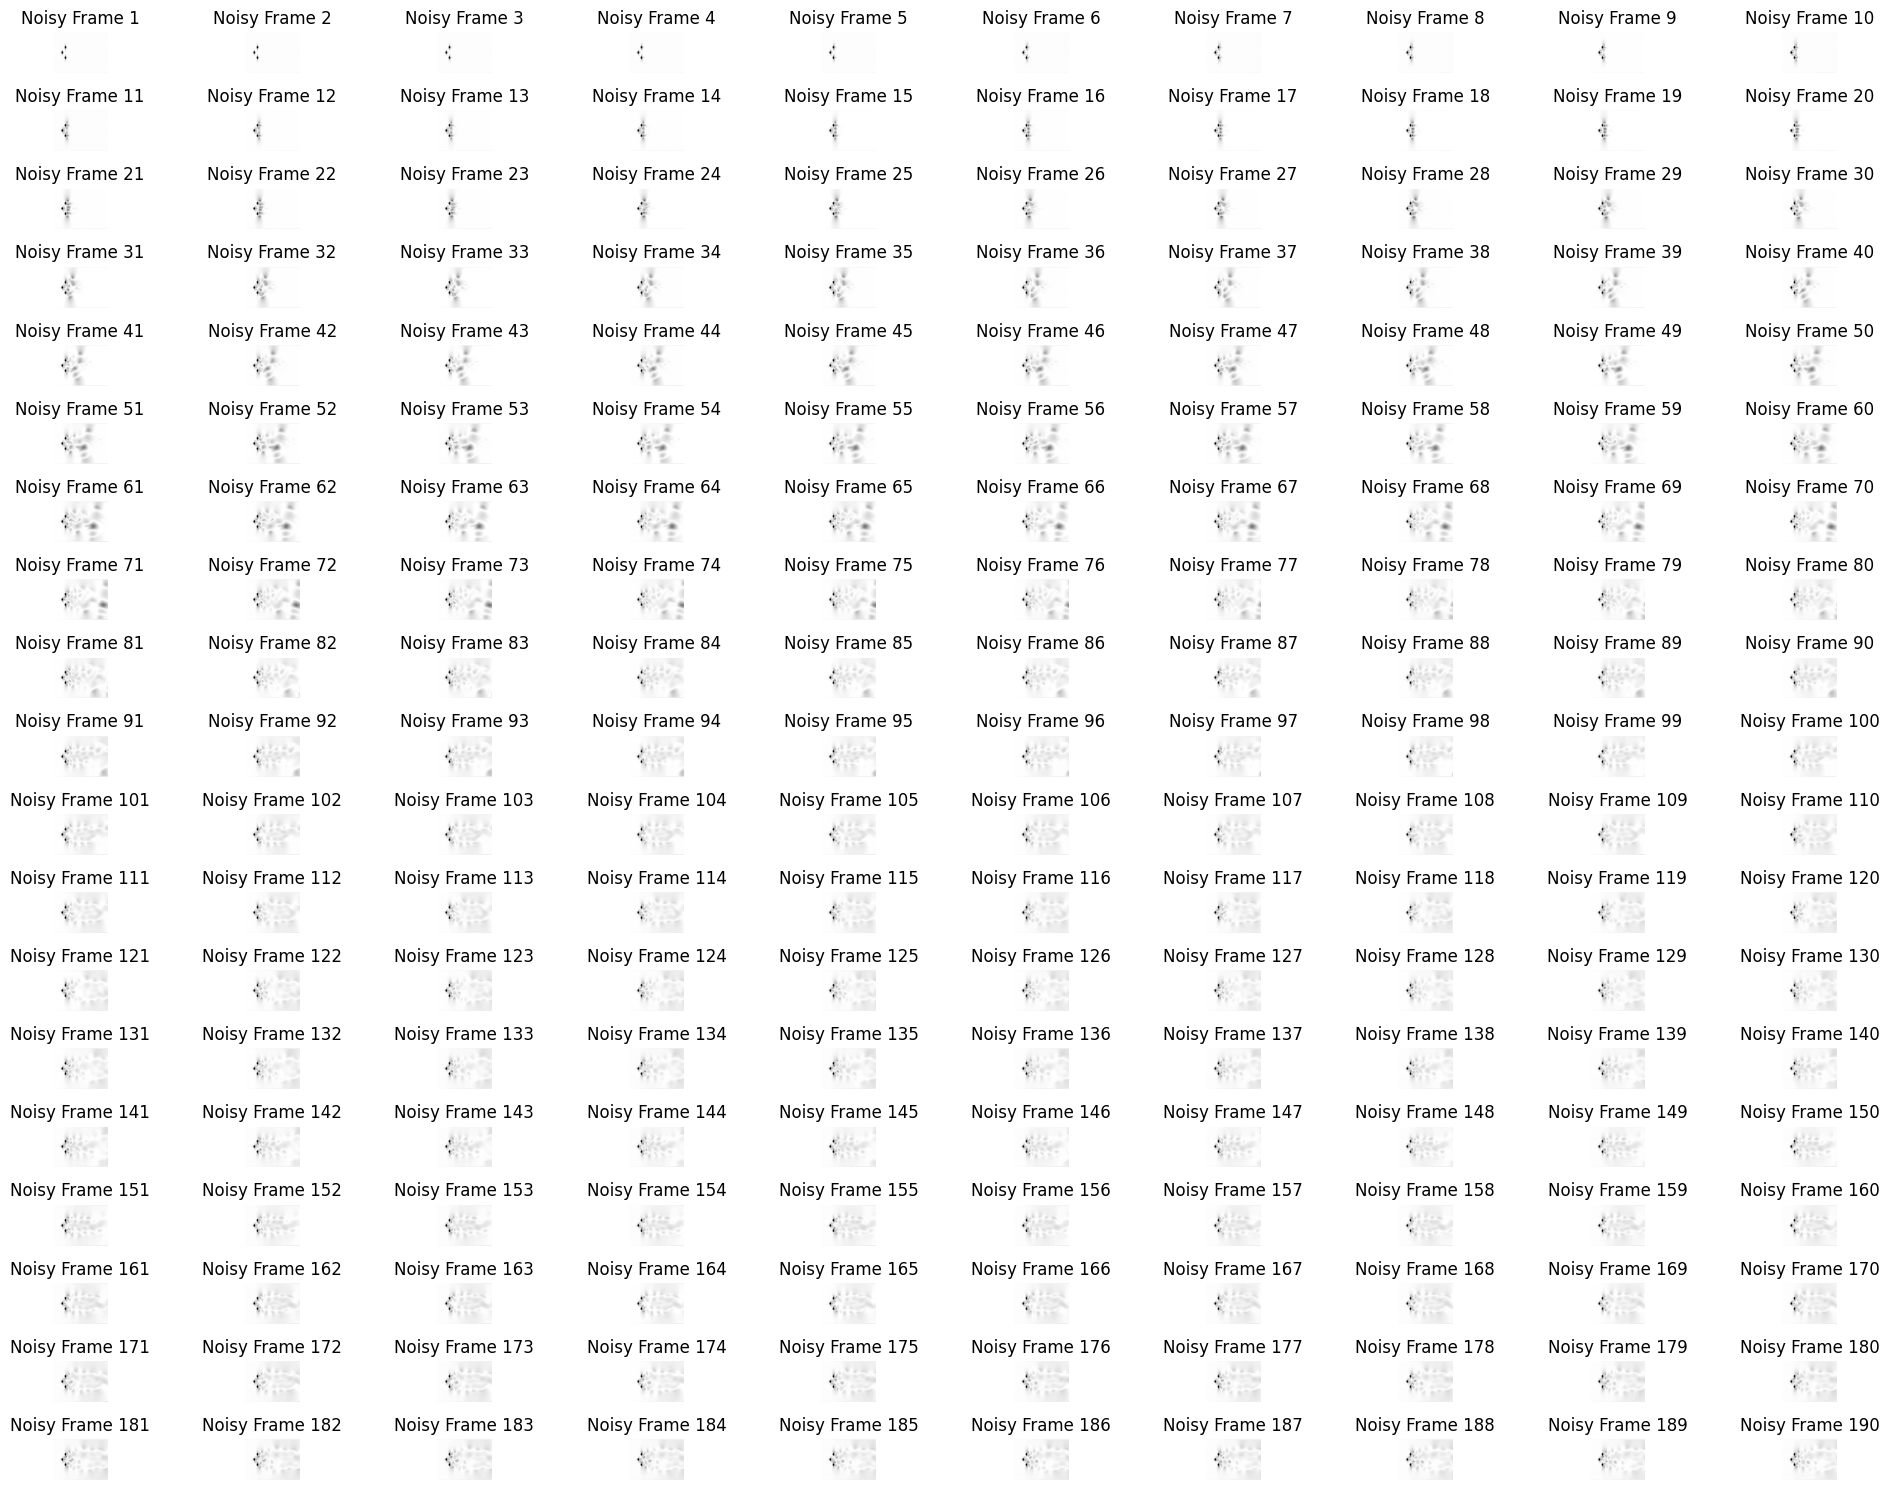

In [ ]:
# # Fix the random seed for consistent noise patterns
# np.random.seed(202)
# # Define noise ratios for different types of noise
# noise_ratios = [0.2, 0.4, 0.6, 0.8]  # Represent 20%, 40%, 60%, and 80%
# # Assuming `frames` is your image array
# num_frames = 100
# # Print array lengths for debugging
# print("Number of frames in code:", num_frames)
# print("Actual length of frames array:", len(frames))
# # Loop through each frame in the array (up to valid range)
# for idx in range(min(num_frames, len(frames))):
#     frame = frames[idx]
#     # Convert to grayscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     # Add Noise (separate functions for clarity)
#     def add_gaussian_noise_frame(frame, noise_ratio):
#         noisy_frame = add_gaussian_noise(frame.copy(), noise_ratio)
#         print(noisy_frame)
#         # print(len(noisy_frame))
#         print(noisy_frame.shape)
#         return noisy_frame
#     for noise_ratio in noise_ratios:
#         noisy_frame_gaussian = add_gaussian_noise_frame(gray_frame.copy(), noise_ratio)




# Fix the random seed for consistent noise patterns
np.random.seed(202)

# Define noise ratio for Gaussian noise
noise_ratio = 0.2  # 20%

# Define the desired width and height for the resized images
resize_width = 200
resize_height = 150

# Function to resize and display noisy image using Matplotlib
def display_noisy_image(title, image, ax):
    resized_image = cv2.resize(image, (resize_width, resize_height))
    num_images = resized_image.shape[0] if len(resized_image.shape) == 3 else 1
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(title)
    ax.axis('off')

# Assuming `frames` is your image array
num_frames = 190

# Create subplots for each frame
num_cols = 10
num_rows = (num_frames + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Initialize a count to track the number of iterations
iteration_count = 0

# Loop through each frame in the array (up to valid range)
for idx in range(num_frames):
    if iteration_count >= num_frames:
        break

    frame = frames[idx]

    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Add Gaussian Noise
    def add_gaussian_noise_frame(frame, noise_ratio):
        # Generate Gaussian noise with the same shape as the frame
        gaussian_noise = np.random.normal(0, 1, frame.shape)
        # Scale the noise according to the ratio
        scaled_noise = noise_ratio * gaussian_noise
        # Add the noise to the frame
        noisy_frame = frame + scaled_noise
        # Clip pixel values to range [0, 255]
        noisy_frame = np.clip(noisy_frame, 0, 255).astype(np.uint8)
        return noisy_frame

    # Add Gaussian noise to the current frame
    noisy_frame_gaussian = add_gaussian_noise_frame(gray_frame.copy(), noise_ratio)

    # Display resized noisy frames
    display_noisy_image(f"Noisy Frame {idx+1}", noisy_frame_gaussian, axes[iteration_count // num_cols, iteration_count % num_cols])

    # Increment the iteration count
    iteration_count += 1

# Hide empty subplots
for i in range(iteration_count, num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')

# Print the total number of images, which corresponds to the total number of frames displayed
print(f"Total number of images: {iteration_count}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
# # Define the desired width and height for the resized images
# resize_width = 200
# resize_height = 150
# # Function to resize and display noisy image using Matplotlib
# def display_noisy_image(title, image, ax):
#     resized_image = cv2.resize(image, (resize_width, resize_height))
#     num_images = resized_image.shape[0] if len(resized_image.shape) == 3 else 1
#     ax.imshow(resized_image, cmap='gray')  # Display grayscale images
#     ax.set_title(f"{title} ({num_images} images)")
#     ax.axis('off')
# # Create subplots for each frame and noise ratio combination
# fig, axes = plt.subplots(num_frames, len(noise_ratios), figsize=(20, 15))
# # Initialize a count to track the number of iterations
# iteration_count = 0
# # Loop through each frame in the array (up to valid range)
# for idx in range(min(num_frames, len(frames))):
#     frame = frames[idx]
#     # Convert to grayscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     # Add Noise
#     for j, noise_ratio in enumerate(noise_ratios):
#         noisy_frame_gaussian = add_gaussian_noise(gray_frame.copy(), noise_ratio)
#         # Display resized noisy frames in separate columns based on noise ratio
#         display_noisy_image(f"Noisy Frame {idx+1} - Gaussian Noise Level {noise_ratio * 100}%", noisy_frame_gaussian, axes[idx, j])
#         # Increment the iteration count
#         iteration_count += 1
# # Print the total number of iterations, which corresponds to the total number of images
# print(f"Total number of images: {iteration_count}")
# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# # Fix the random seed for consistent noise patterns
# np.random.seed(202)

# # Define the desired width and height for the resized images
# resize_width = 200
# resize_height = 150

# # Function to resize and display noisy image using Matplotlib
# def display_noisy_image(title, image, ax):
#     resized_image = cv2.resize(image, (resize_width, resize_height))
#     num_images = resized_image.shape[0] if len(resized_image.shape) == 3 else 1
#     ax.imshow(resized_image, cmap='gray')  # Display grayscale images
#     ax.set_title(f"{title} ({num_images} images)")
#     ax.axis('off')

# # Define noise ratios for different types of noise
# noise_ratios = [0.2]  # Represent 20%

# # Assuming `frames` is your image array
# num_frames = 10  # Display only the first 10 frames

# # Create subplots for each frame and noise ratio combination
# fig, axes = plt.subplots(num_frames, len(noise_ratios), figsize=(20, 15))

# # Initialize a count to track the number of iterations
# iteration_count = 0

# # Loop through each frame in the array (up to valid range)
# for idx in range(min(num_frames, len(frames))):
#     frame = frames[idx]

#     # Convert to grayscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Add Gaussian Noise
#     def add_gaussian_noise_frame(frame, noise_ratio):
#         # Generate Gaussian noise with the same shape as the frame
#         gaussian_noise = np.random.normal(0, 1, frame.shape)
#         # Scale the noise according to the ratio
#         scaled_noise = noise_ratio * gaussian_noise
#         # Add the noise to the frame
#         noisy_frame = frame + scaled_noise
#         # Clip pixel values to range [0, 255]
#         noisy_frame = np.clip(noisy_frame, 0, 255).astype(np.uint8)
#         return noisy_frame

#     # Add Noise
#     for j, noise_ratio in enumerate(noise_ratios):
#         noisy_frame_gaussian = add_gaussian_noise_frame(gray_frame.copy(), noise_ratio)
#         # Display resized noisy frames
#         display_noisy_image(f"Noisy Frame {idx+1} - Gaussian Noise Level {noise_ratio * 100}%", noisy_frame_gaussian, axes[idx])
#         # Increment the iteration count
#         iteration_count += 1

# # Print the total number of images, which corresponds to the total number of frames displayed
# print(f"Total number of images: {iteration_count}")

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


### **4.2. Effect of Gaussian Noise on POD Modes**

In [ ]:
# def preprocess_image(frame, resize_factor=0.2):
#     # Resize the image
#     height, width = frame.shape[:2]
#     new_height = int(height * resize_factor)
#     new_width = int(width * resize_factor)
#     resized_frame = cv2.resize(frame, (new_width, new_height))
#     # Convert to grayscale if necessary
#     if len(resized_frame.shape) == 3:
#         gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
#     else:
#         gray_frame = resized_frame
#     return gray_frame
# import numpy as np
# # List to store preprocessed noisy frames
# stacked_noisy_images = []
# # Loop through each frame in the array (up to valid range)
# for idx in range(min(num_frames, len(frames))):
#     frame = frames[idx].copy()  # Make sure to copy the frame before modifying it
#     # Convert to grayscale only if it's not already grayscale
#     if len(frame.shape) == 3:
#         gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
#     else:
#         gray_frame = frame  # Image is already grayscale
#     # Preprocess each noisy frame
#     for noise_ratio in noise_ratios:
#         # Add noise
#         noisy_frame = add_gaussian_noise(gray_frame, noise_ratio)
#         # Preprocess the noisy frame
#         preprocessed_noisy_frame = preprocess_image(noisy_frame)
#         # Append preprocessed noisy frame to the list
#         stacked_noisy_images.append(preprocessed_noisy_frame)
# # Convert the list of preprocessed noisy frames into a numpy array
# stacked_noisy_images_array = np.array(stacked_noisy_images)
# print(stacked_noisy_images_array.shape)

def preprocess_image(frame, resize_factor=0.2):
    # Resize the image
    height, width = frame.shape[:2]
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    resized_frame = cv2.resize(frame, (new_width, new_height))
    # Convert to grayscale if necessary
    if len(resized_frame.shape) == 3:
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = resized_frame
    return gray_frame

import numpy as np

# List to store preprocessed noisy frames
stacked_noisy_images = []

# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx].copy()  # Make sure to copy the frame before modifying it
    # Convert to grayscale only if it's not already grayscale
    if len(frame.shape) == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    else:
        gray_frame = frame  # Image is already grayscale
    # Preprocess each noisy frame
    for noise_ratio in noise_ratios:
        # Add noise
        noisy_frame = add_gaussian_noise(gray_frame, noise_ratio)
        # Preprocess the noisy frame
        preprocessed_noisy_frame = preprocess_image(noisy_frame)
        # Append preprocessed noisy frame to the list
        stacked_noisy_images.append(preprocessed_noisy_frame)

# Convert the list of preprocessed noisy frames into a numpy array
stacked_noisy_images_array = np.array(stacked_noisy_images)

print(stacked_noisy_images_array.shape)


(190, 141, 311)


In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)

# Now 'mean_noisy_image' contains the mean image of the stacked noisy images
print("Mean noisy image:", mean_noisy_image)
print("Mean noisy image shape:", mean_noisy_image.shape)


Mean noisy image: [[215.7        218.08947368 213.61052632 ... 202.12631579 204.22105263
  203.05789474]
 [216.66315789 217.12631579 217.96842105 ... 213.5        216.45789474
  215.47368421]
 [222.51578947 216.26842105 217.14210526 ... 214.15263158 217.77894737
  213.11578947]
 ...
 [214.13157895 217.34210526 217.11052632 ... 215.50526316 217.05789474
  219.27368421]
 [218.         217.11578947 218.7        ... 209.11052632 209.70526316
  205.47894737]
 [215.77368421 213.9        215.70526316 ... 196.62631579 195.25789474
  197.21578947]]
Mean noisy image shape: (141, 311)


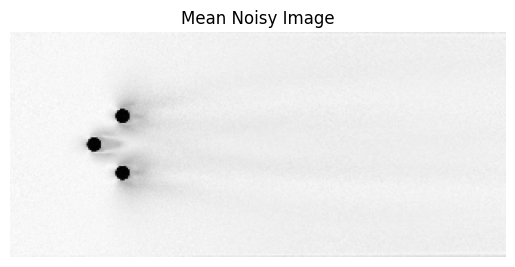

In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)
# Display the mean noisy image using matplotlib.pyplot
plt.imshow(mean_noisy_image, cmap='gray')
plt.title('Mean Noisy Image')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Calculate the mean-subtracted images for the stacked noisy images
mean_subtracted_noisy_images = stacked_noisy_images_array - mean_noisy_image
print(mean_subtracted_noisy_images)
print(mean_subtracted_noisy_images.shape)

[[[  21.3         -29.08947368   27.38947368 ...  -34.12631579
     49.77894737   13.94210526]
  [  -3.66315789  -63.12631579  -23.96842105 ...   40.5
     36.54210526   36.52631579]
  [  16.48421053   24.73157895  -12.14210526 ...   38.84736842
     15.22105263   41.88421053]
  ...
  [  21.86842105  -29.34210526  -14.11052632 ...   26.49473684
     13.94210526   34.72631579]
  [  -8.            3.88421053   33.3        ...  -49.11052632
     42.29473684   49.52105263]
  [ -44.77368421   20.1          38.29473684 ...   -3.62631579
     37.74210526   32.78421053]]

 [[  35.3         -38.08947368   38.38947368 ...   51.87368421
     49.77894737   24.94210526]
  [  37.33684211  -37.12631579   29.03157895 ...    9.5
     -0.45789474   -4.47368421]
  [ -28.51578947  -48.26842105   20.85789474 ...   -5.15263158
     37.22105263  -26.11578947]
  ...
  [  39.86842105   37.65789474   -1.11052632 ...  -32.50526316
     35.94210526  -13.27368421]
  [  33.           24.88421053    8.3        ...  

In [ ]:
# Reshape the mean-subtracted images into a 2D matrix for SVD
num_images, height, width = mean_subtracted_noisy_images.shape
mean_subtracted_noisy_images_2d = mean_subtracted_noisy_images.reshape(num_images, height * width)
# Apply Singular Value Decomposition (SVD)
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(mean_subtracted_noisy_images_2d, full_matrices=False)
# U_noisy: Left singular vectors (eigenmodes) represent the dominant spatial patterns of variation.
# S_noisy: Singular values represent the variance captured by each eigenmode.
# Vt_noisy: Transpose of right singular vectors (not typically used in POD).
# Print the shapes of the matrices
print(U_noisy)
print("U_noisy shape:", U_noisy.shape)
print(S_noisy)
print("S_noisy shape:", S_noisy.shape)
print(Vt_noisy)
print("Vt_noisy shape:", Vt_noisy.shape)

[[-0.08294311  0.01633537 -0.01187423 ...  0.05907747  0.13164226
  -0.07254763]
 [-0.08523302  0.01891084 -0.01769729 ... -0.26892643 -0.19198884
  -0.07254763]
 [-0.09122988  0.02067358 -0.01985886 ...  0.26964779  0.29417103
  -0.07254763]
 ...
 [ 0.03184963  0.04435236  0.01214476 ... -0.01399944 -0.01471389
  -0.07254763]
 [ 0.02758704  0.04437092  0.01214422 ... -0.01649018  0.02497933
  -0.07254763]
 [ 0.0163775   0.04119538  0.01140338 ... -0.02992865  0.01536835
  -0.07254763]]
U_noisy shape: (190, 190)
[1.04690499e+04 8.95278476e+03 8.38179258e+03 8.13653513e+03
 7.88943888e+03 7.65716953e+03 7.60263766e+03 7.32005775e+03
 7.25012736e+03 7.01291530e+03 6.74285387e+03 6.56547161e+03
 6.47247026e+03 6.40777932e+03 6.27439917e+03 6.20069048e+03
 6.15034786e+03 6.11654723e+03 6.06177577e+03 5.98615647e+03
 5.93487388e+03 5.90519594e+03 5.84710641e+03 5.83327920e+03
 5.79206595e+03 5.77125694e+03 5.75339447e+03 5.73264859e+03
 5.71581351e+03 5.70284125e+03 5.68521056e+03 5.6788115

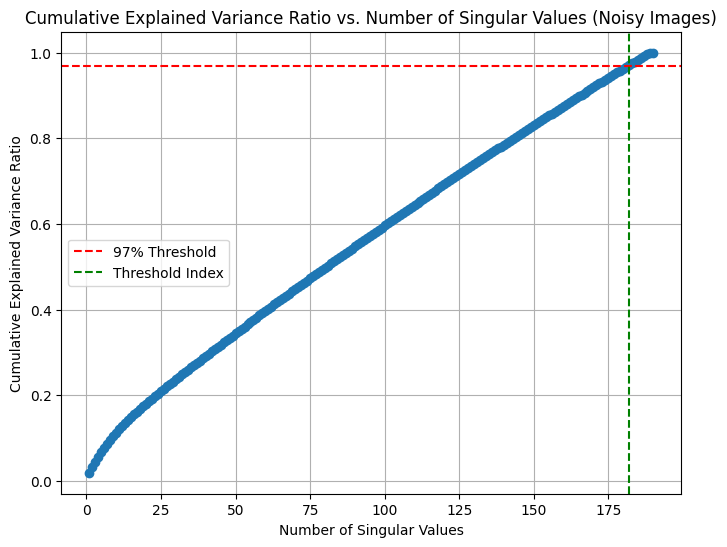

In [ ]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio_noisy = (S_noisy ** 2) / np.sum(S_noisy ** 2)
cumulative_variance_ratio_noisy = np.cumsum(explained_variance_ratio_noisy)
# Find the index where cumulative explained variance ratio exceeds 97%
threshold_index_noisy = np.argmax(cumulative_variance_ratio_noisy >= 0.97) + 1  # Adding 1 to start from 1
# Plot the cumulative explained variance ratio vs. the number of singular values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio_noisy) + 1), cumulative_variance_ratio_noisy, marker='o', linestyle='-')
plt.axhline(y=0.97, color='r', linestyle='--', label='97% Threshold')  # Horizontal line for 97% threshold
plt.axvline(x=threshold_index_noisy, color='g', linestyle='--', label='Threshold Index')  # Vertical line for threshold index
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Singular Values (Noisy Images)')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

# **40 Percent Gaussian Noise**

Total number of images: 190


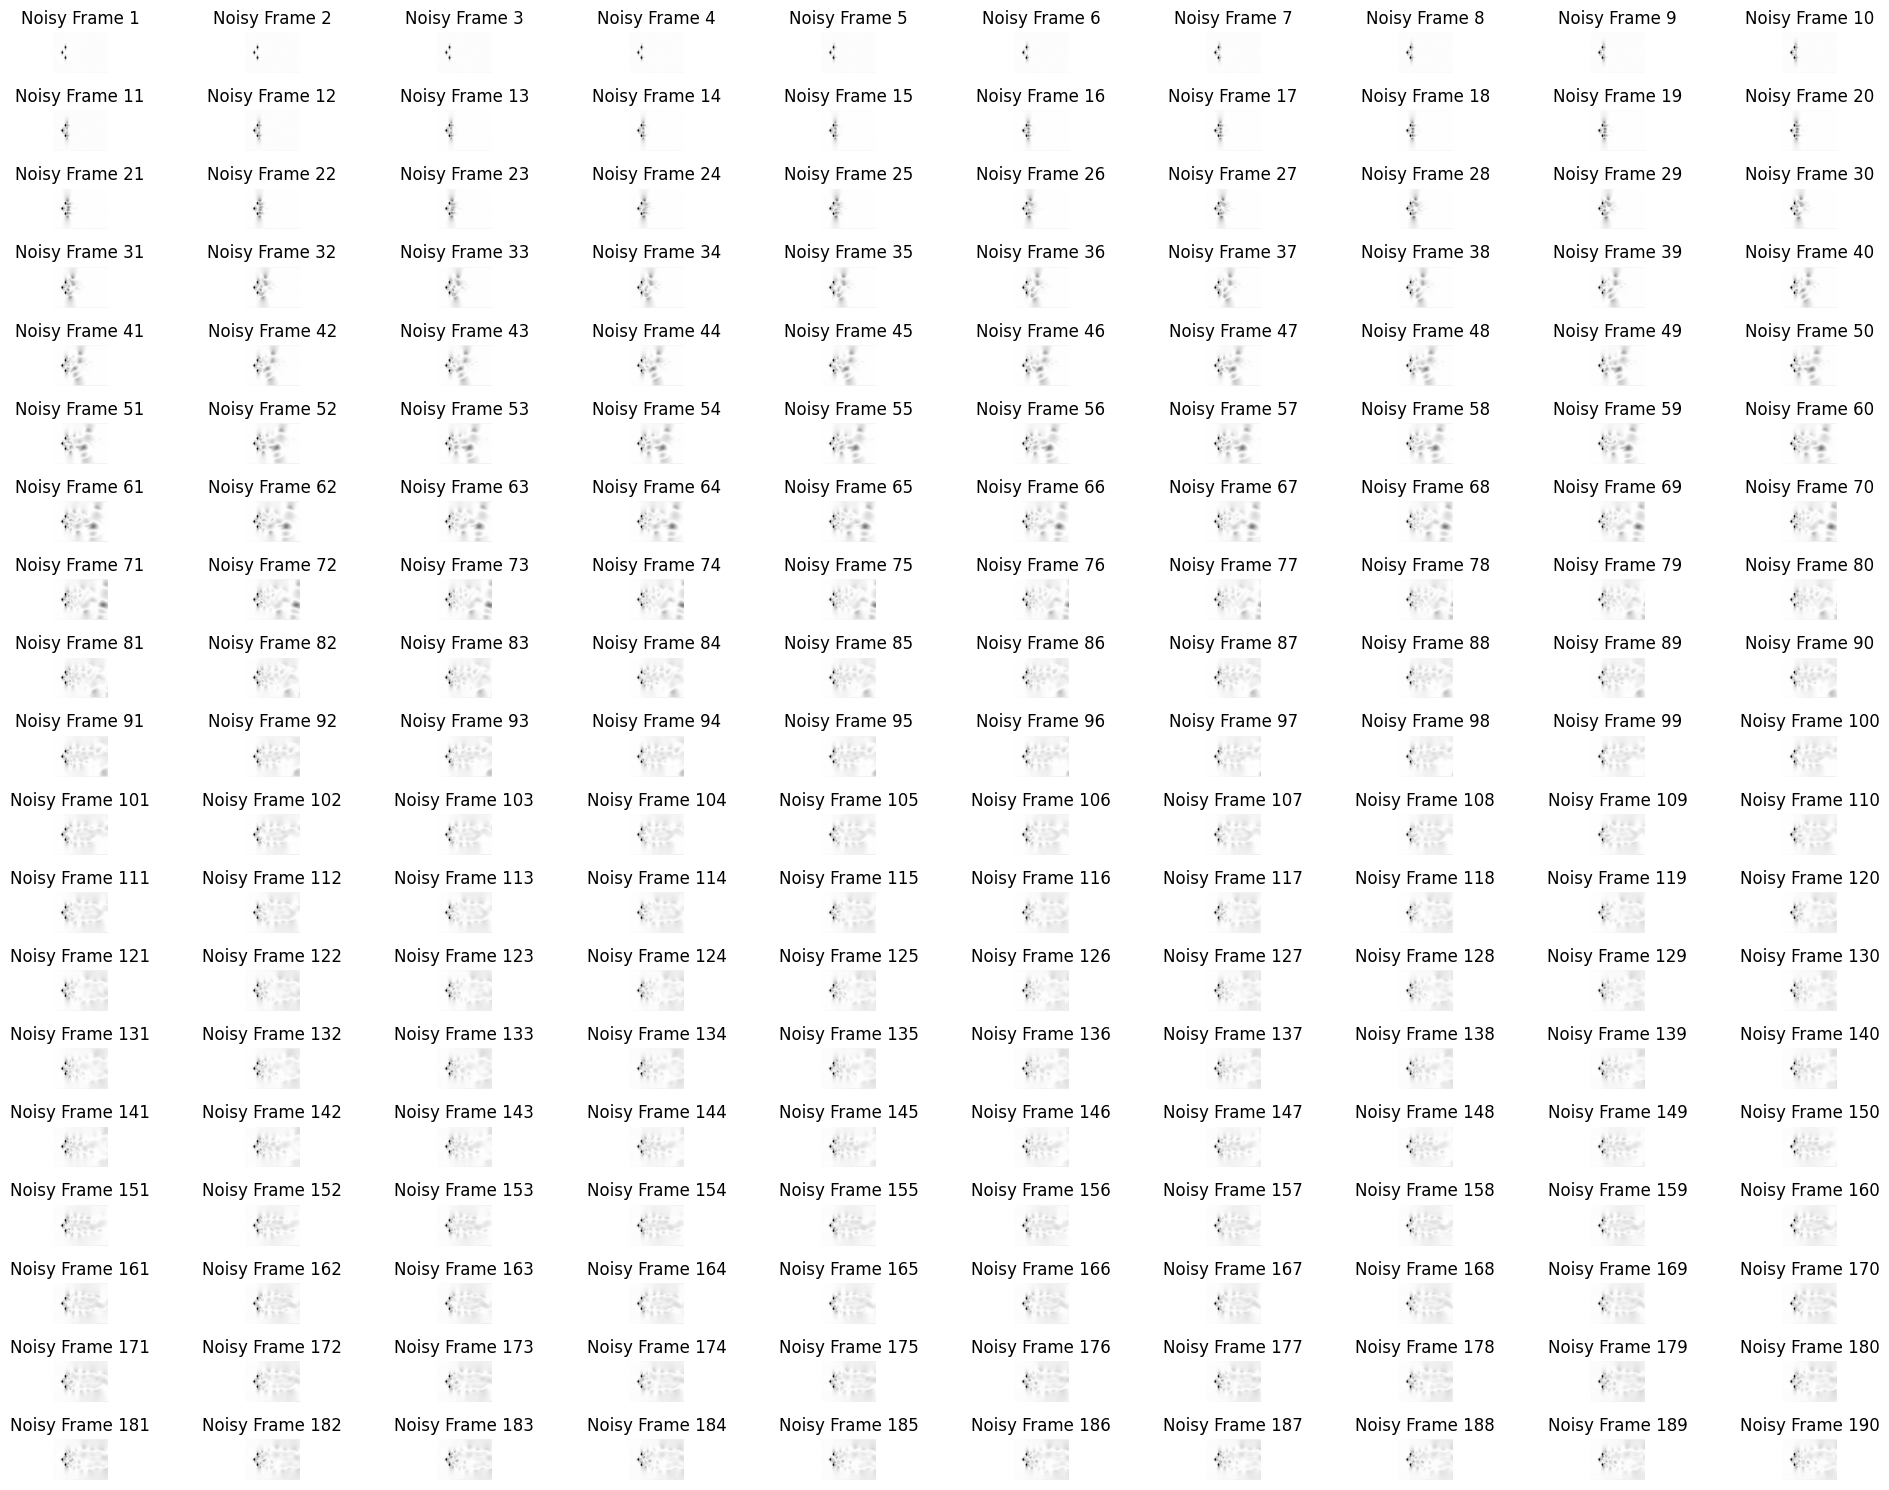

In [ ]:
# Fix the random seed for consistent noise patterns
np.random.seed(202)

# Define noise ratio for Gaussian noise
noise_ratio = 0.4  # 20%

# Define the desired width and height for the resized images
resize_width = 200
resize_height = 150

# Function to resize and display noisy image using Matplotlib
def display_noisy_image(title, image, ax):
    resized_image = cv2.resize(image, (resize_width, resize_height))
    num_images = resized_image.shape[0] if len(resized_image.shape) == 3 else 1
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(title)
    ax.axis('off')

# Assuming `frames` is your image array
num_frames = 190

# Create subplots for each frame
num_cols = 10
num_rows = (num_frames + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Initialize a count to track the number of iterations
iteration_count = 0

# Loop through each frame in the array (up to valid range)
for idx in range(num_frames):
    if iteration_count >= num_frames:
        break

    frame = frames[idx]

    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Add Gaussian Noise
    def add_gaussian_noise_frame(frame, noise_ratio):
        # Generate Gaussian noise with the same shape as the frame
        gaussian_noise = np.random.normal(0, 1, frame.shape)
        # Scale the noise according to the ratio
        scaled_noise = noise_ratio * gaussian_noise
        # Add the noise to the frame
        noisy_frame = frame + scaled_noise
        # Clip pixel values to range [0, 255]
        noisy_frame = np.clip(noisy_frame, 0, 255).astype(np.uint8)
        return noisy_frame

    # Add Gaussian noise to the current frame
    noisy_frame_gaussian = add_gaussian_noise_frame(gray_frame.copy(), noise_ratio)

    # Display resized noisy frames
    display_noisy_image(f"Noisy Frame {idx+1}", noisy_frame_gaussian, axes[iteration_count // num_cols, iteration_count % num_cols])

    # Increment the iteration count
    iteration_count += 1

# Hide empty subplots
for i in range(iteration_count, num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')

# Print the total number of images, which corresponds to the total number of frames displayed
print(f"Total number of images: {iteration_count}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
def preprocess_image(frame, resize_factor=0.2):
    # Resize the image
    height, width = frame.shape[:2]
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    resized_frame = cv2.resize(frame, (new_width, new_height))
    # Convert to grayscale if necessary
    if len(resized_frame.shape) == 3:
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = resized_frame
    return gray_frame

import numpy as np

# List to store preprocessed noisy frames
stacked_noisy_images = []

# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx].copy()  # Make sure to copy the frame before modifying it
    # Convert to grayscale only if it's not already grayscale
    if len(frame.shape) == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    else:
        gray_frame = frame  # Image is already grayscale
    # Preprocess each noisy frame
    for noise_ratio in noise_ratios:
        # Add noise
        noisy_frame = add_gaussian_noise(gray_frame, noise_ratio)
        # Preprocess the noisy frame
        preprocessed_noisy_frame = preprocess_image(noisy_frame)
        # Append preprocessed noisy frame to the list
        stacked_noisy_images.append(preprocessed_noisy_frame)

# Convert the list of preprocessed noisy frames into a numpy array
stacked_noisy_images_array = np.array(stacked_noisy_images)

print(stacked_noisy_images_array.shape)


(190, 141, 311)


In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)

# Now 'mean_noisy_image' contains the mean image of the stacked noisy images
print("Mean noisy image:", mean_noisy_image)
print("Mean noisy image shape:", mean_noisy_image.shape)


Mean noisy image: [[215.7        218.08947368 213.61052632 ... 202.12631579 204.22105263
  203.05789474]
 [216.66315789 217.12631579 217.96842105 ... 213.5        216.45789474
  215.47368421]
 [222.51578947 216.26842105 217.14210526 ... 214.15263158 217.77894737
  213.11578947]
 ...
 [214.13157895 217.34210526 217.11052632 ... 215.50526316 217.05789474
  219.27368421]
 [218.         217.11578947 218.7        ... 209.11052632 209.70526316
  205.47894737]
 [215.77368421 213.9        215.70526316 ... 196.62631579 195.25789474
  197.21578947]]
Mean noisy image shape: (141, 311)


In [ ]:
# Calculate the mean-subtracted images for the stacked noisy images
mean_subtracted_noisy_images = stacked_noisy_images_array - mean_noisy_image
print(mean_subtracted_noisy_images)
print(mean_subtracted_noisy_images.shape)

[[[  21.3         -29.08947368   27.38947368 ...  -34.12631579
     49.77894737   13.94210526]
  [  -3.66315789  -63.12631579  -23.96842105 ...   40.5
     36.54210526   36.52631579]
  [  16.48421053   24.73157895  -12.14210526 ...   38.84736842
     15.22105263   41.88421053]
  ...
  [  21.86842105  -29.34210526  -14.11052632 ...   26.49473684
     13.94210526   34.72631579]
  [  -8.            3.88421053   33.3        ...  -49.11052632
     42.29473684   49.52105263]
  [ -44.77368421   20.1          38.29473684 ...   -3.62631579
     37.74210526   32.78421053]]

 [[  35.3         -38.08947368   38.38947368 ...   51.87368421
     49.77894737   24.94210526]
  [  37.33684211  -37.12631579   29.03157895 ...    9.5
     -0.45789474   -4.47368421]
  [ -28.51578947  -48.26842105   20.85789474 ...   -5.15263158
     37.22105263  -26.11578947]
  ...
  [  39.86842105   37.65789474   -1.11052632 ...  -32.50526316
     35.94210526  -13.27368421]
  [  33.           24.88421053    8.3        ...  

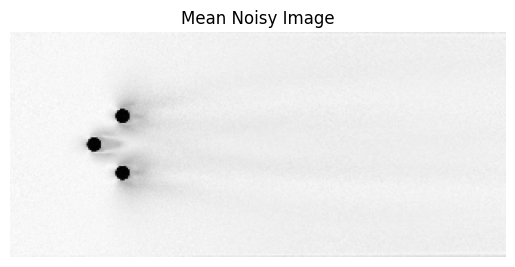

In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)
# Display the mean noisy image using matplotlib.pyplot
plt.imshow(mean_noisy_image, cmap='gray')
plt.title('Mean Noisy Image')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Calculate the mean-subtracted images for the stacked noisy images
mean_subtracted_noisy_images = stacked_noisy_images_array - mean_noisy_image
print(mean_subtracted_noisy_images)
print(mean_subtracted_noisy_images.shape)

[[[  21.3         -29.08947368   27.38947368 ...  -34.12631579
     49.77894737   13.94210526]
  [  -3.66315789  -63.12631579  -23.96842105 ...   40.5
     36.54210526   36.52631579]
  [  16.48421053   24.73157895  -12.14210526 ...   38.84736842
     15.22105263   41.88421053]
  ...
  [  21.86842105  -29.34210526  -14.11052632 ...   26.49473684
     13.94210526   34.72631579]
  [  -8.            3.88421053   33.3        ...  -49.11052632
     42.29473684   49.52105263]
  [ -44.77368421   20.1          38.29473684 ...   -3.62631579
     37.74210526   32.78421053]]

 [[  35.3         -38.08947368   38.38947368 ...   51.87368421
     49.77894737   24.94210526]
  [  37.33684211  -37.12631579   29.03157895 ...    9.5
     -0.45789474   -4.47368421]
  [ -28.51578947  -48.26842105   20.85789474 ...   -5.15263158
     37.22105263  -26.11578947]
  ...
  [  39.86842105   37.65789474   -1.11052632 ...  -32.50526316
     35.94210526  -13.27368421]
  [  33.           24.88421053    8.3        ...  

In [ ]:
# Reshape the mean-subtracted images into a 2D matrix for SVD
num_images, height, width = mean_subtracted_noisy_images.shape
mean_subtracted_noisy_images_2d = mean_subtracted_noisy_images.reshape(num_images, height * width)
# Apply Singular Value Decomposition (SVD)
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(mean_subtracted_noisy_images_2d, full_matrices=False)
# U_noisy: Left singular vectors (eigenmodes) represent the dominant spatial patterns of variation.
# S_noisy: Singular values represent the variance captured by each eigenmode.
# Vt_noisy: Transpose of right singular vectors (not typically used in POD).
# Print the shapes of the matrices
print(U_noisy)
print("U_noisy shape:", U_noisy.shape)
print(S_noisy)
print("S_noisy shape:", S_noisy.shape)
print(Vt_noisy)
print("Vt_noisy shape:", Vt_noisy.shape)

[[-0.08294311  0.01633537 -0.01187423 ...  0.05907747  0.13164226
  -0.07254763]
 [-0.08523302  0.01891084 -0.01769729 ... -0.26892643 -0.19198884
  -0.07254763]
 [-0.09122988  0.02067358 -0.01985886 ...  0.26964779  0.29417103
  -0.07254763]
 ...
 [ 0.03184963  0.04435236  0.01214476 ... -0.01399944 -0.01471389
  -0.07254763]
 [ 0.02758704  0.04437092  0.01214422 ... -0.01649018  0.02497933
  -0.07254763]
 [ 0.0163775   0.04119538  0.01140338 ... -0.02992865  0.01536835
  -0.07254763]]
U_noisy shape: (190, 190)
[1.04690499e+04 8.95278476e+03 8.38179258e+03 8.13653513e+03
 7.88943888e+03 7.65716953e+03 7.60263766e+03 7.32005775e+03
 7.25012736e+03 7.01291530e+03 6.74285387e+03 6.56547161e+03
 6.47247026e+03 6.40777932e+03 6.27439917e+03 6.20069048e+03
 6.15034786e+03 6.11654723e+03 6.06177577e+03 5.98615647e+03
 5.93487388e+03 5.90519594e+03 5.84710641e+03 5.83327920e+03
 5.79206595e+03 5.77125694e+03 5.75339447e+03 5.73264859e+03
 5.71581351e+03 5.70284125e+03 5.68521056e+03 5.6788115

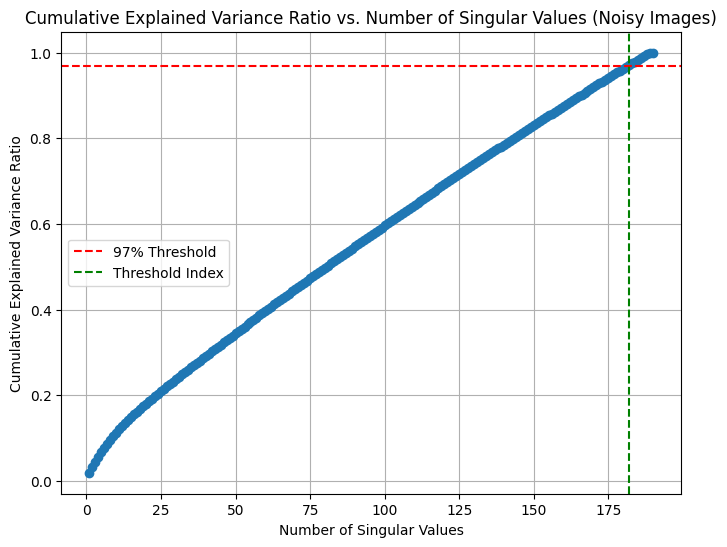

In [ ]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio_noisy = (S_noisy ** 2) / np.sum(S_noisy ** 2)
cumulative_variance_ratio_noisy = np.cumsum(explained_variance_ratio_noisy)
# Find the index where cumulative explained variance ratio exceeds 97%
threshold_index_noisy = np.argmax(cumulative_variance_ratio_noisy >= 0.97) + 1  # Adding 1 to start from 1
# Plot the cumulative explained variance ratio vs. the number of singular values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio_noisy) + 1), cumulative_variance_ratio_noisy, marker='o', linestyle='-')
plt.axhline(y=0.97, color='r', linestyle='--', label='97% Threshold')  # Horizontal line for 97% threshold
plt.axvline(x=threshold_index_noisy, color='g', linestyle='--', label='Threshold Index')  # Vertical line for threshold index
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Singular Values (Noisy Images)')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

# **60% Gaussian**

Total number of images: 190


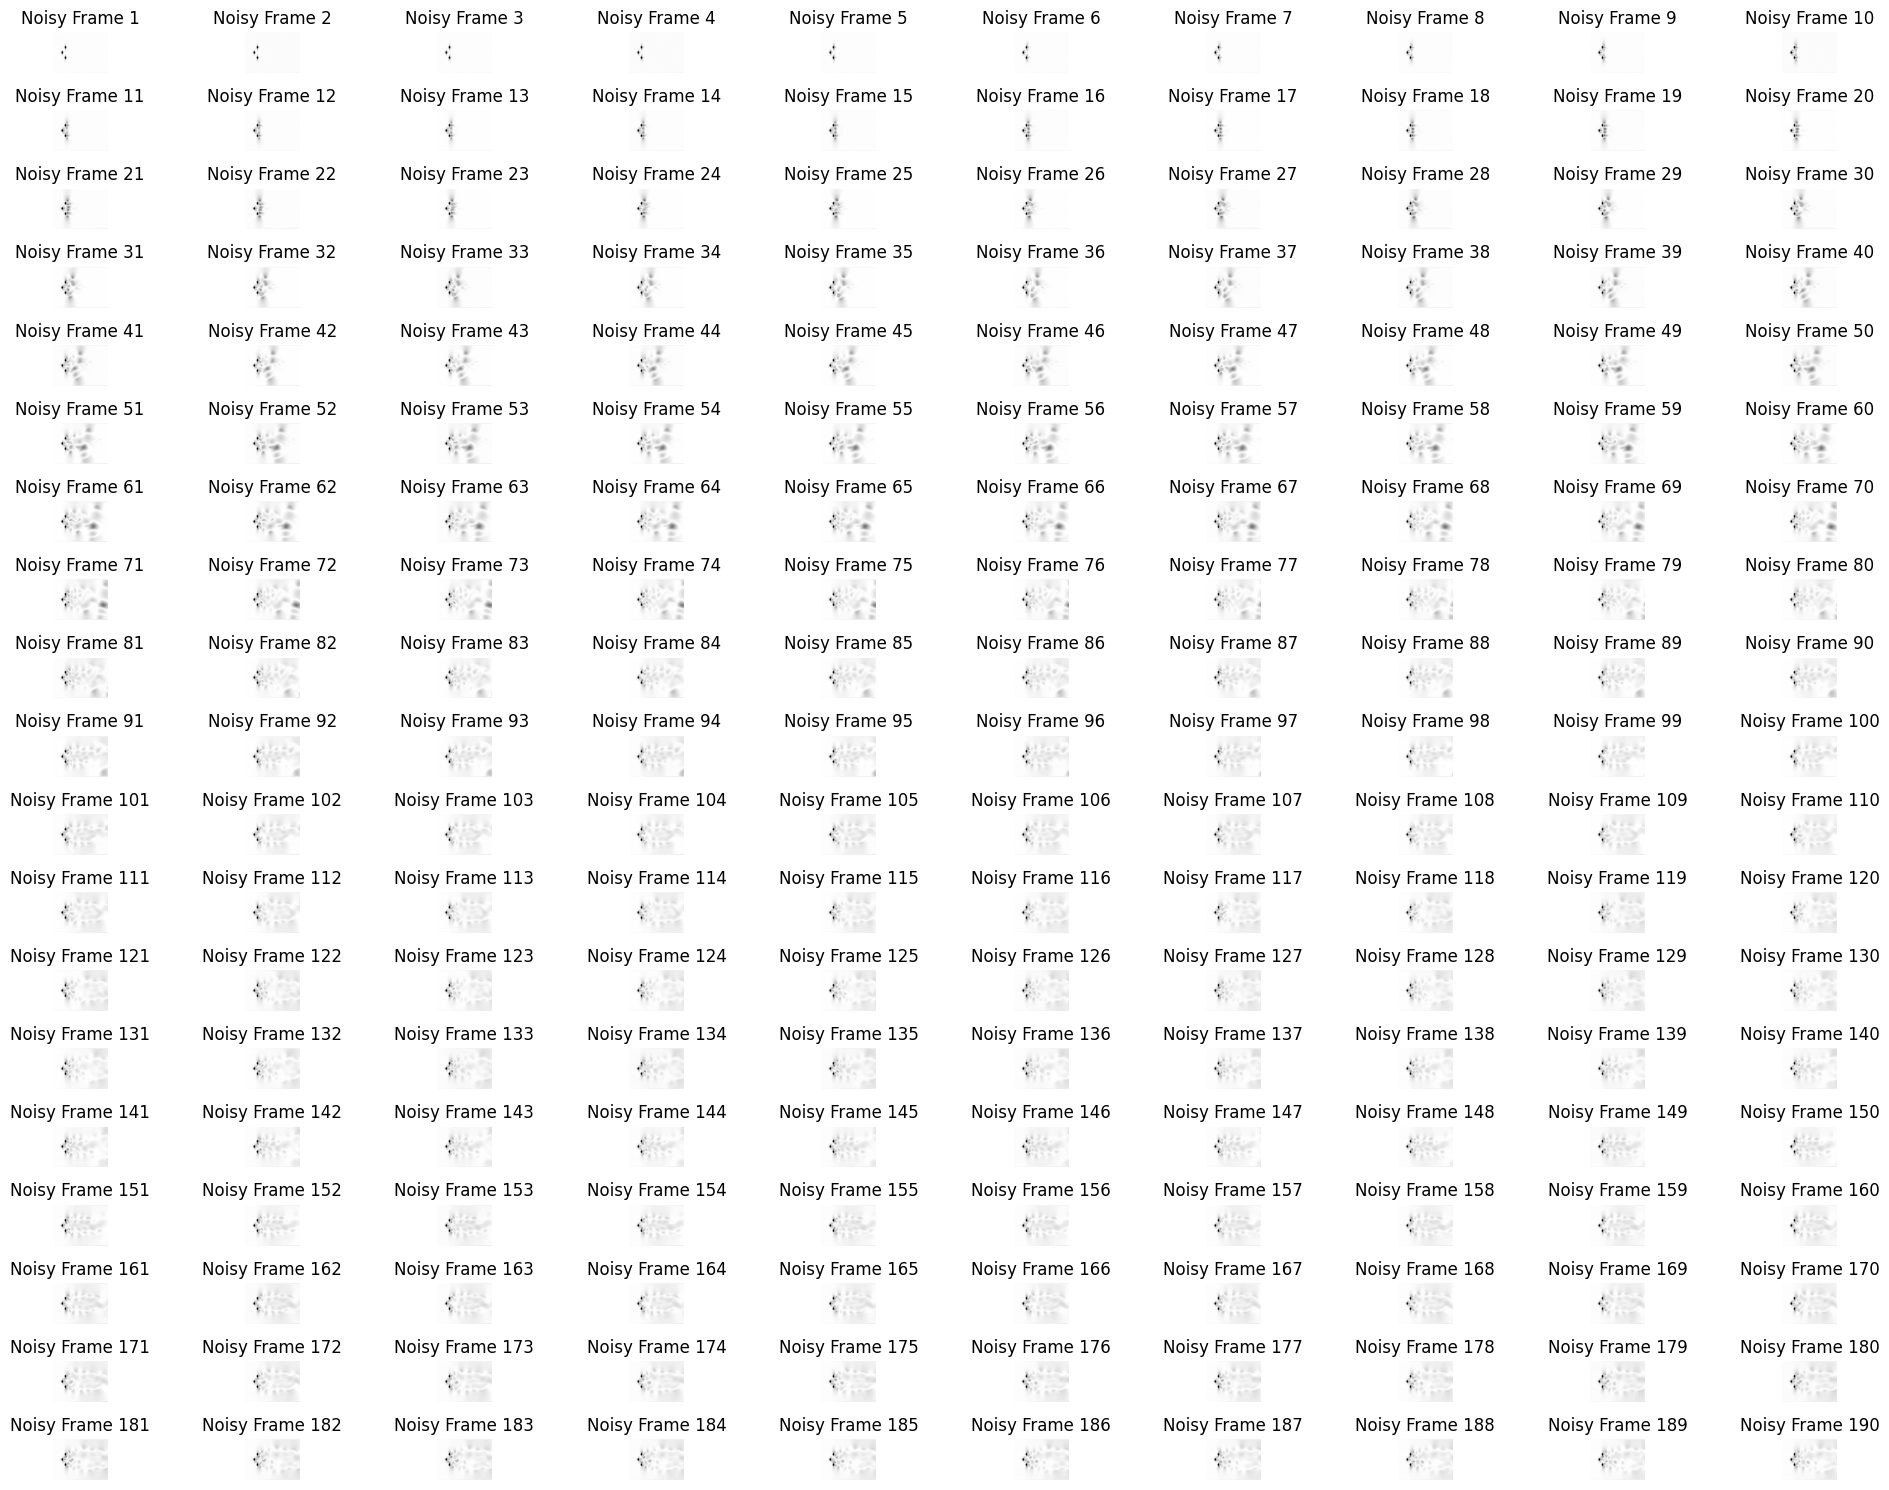

In [ ]:
# Fix the random seed for consistent noise patterns
np.random.seed(202)

# Define noise ratio for Gaussian noise
noise_ratio = 0.6  # 20%

# Define the desired width and height for the resized images
resize_width = 200
resize_height = 150

# Function to resize and display noisy image using Matplotlib
def display_noisy_image(title, image, ax):
    resized_image = cv2.resize(image, (resize_width, resize_height))
    num_images = resized_image.shape[0] if len(resized_image.shape) == 3 else 1
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(title)
    ax.axis('off')

# Assuming `frames` is your image array
num_frames = 190

# Create subplots for each frame
num_cols = 10
num_rows = (num_frames + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Initialize a count to track the number of iterations
iteration_count = 0

# Loop through each frame in the array (up to valid range)
for idx in range(num_frames):
    if iteration_count >= num_frames:
        break

    frame = frames[idx]

    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Add Gaussian Noise
    def add_gaussian_noise_frame(frame, noise_ratio):
        # Generate Gaussian noise with the same shape as the frame
        gaussian_noise = np.random.normal(0, 1, frame.shape)
        # Scale the noise according to the ratio
        scaled_noise = noise_ratio * gaussian_noise
        # Add the noise to the frame
        noisy_frame = frame + scaled_noise
        # Clip pixel values to range [0, 255]
        noisy_frame = np.clip(noisy_frame, 0, 255).astype(np.uint8)
        return noisy_frame

    # Add Gaussian noise to the current frame
    noisy_frame_gaussian = add_gaussian_noise_frame(gray_frame.copy(), noise_ratio)

    # Display resized noisy frames
    display_noisy_image(f"Noisy Frame {idx+1}", noisy_frame_gaussian, axes[iteration_count // num_cols, iteration_count % num_cols])

    # Increment the iteration count
    iteration_count += 1

# Hide empty subplots
for i in range(iteration_count, num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')

# Print the total number of images, which corresponds to the total number of frames displayed
print(f"Total number of images: {iteration_count}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
def preprocess_image(frame, resize_factor=0.2):
    # Resize the image
    height, width = frame.shape[:2]
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    resized_frame = cv2.resize(frame, (new_width, new_height))
    # Convert to grayscale if necessary
    if len(resized_frame.shape) == 3:
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = resized_frame
    return gray_frame

import numpy as np

# List to store preprocessed noisy frames
stacked_noisy_images = []

# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx].copy()  # Make sure to copy the frame before modifying it
    # Convert to grayscale only if it's not already grayscale
    if len(frame.shape) == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    else:
        gray_frame = frame  # Image is already grayscale
    # Preprocess each noisy frame
    for noise_ratio in noise_ratios:
        # Add noise
        noisy_frame = add_gaussian_noise(gray_frame, noise_ratio)
        # Preprocess the noisy frame
        preprocessed_noisy_frame = preprocess_image(noisy_frame)
        # Append preprocessed noisy frame to the list
        stacked_noisy_images.append(preprocessed_noisy_frame)

# Convert the list of preprocessed noisy frames into a numpy array
stacked_noisy_images_array = np.array(stacked_noisy_images)

print(stacked_noisy_images_array.shape)


(190, 141, 311)


In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)

# Now 'mean_noisy_image' contains the mean image of the stacked noisy images
print("Mean noisy image:", mean_noisy_image)
print("Mean noisy image shape:", mean_noisy_image.shape)


Mean noisy image: [[215.7        218.08947368 213.61052632 ... 202.12631579 204.22105263
  203.05789474]
 [216.66315789 217.12631579 217.96842105 ... 213.5        216.45789474
  215.47368421]
 [222.51578947 216.26842105 217.14210526 ... 214.15263158 217.77894737
  213.11578947]
 ...
 [214.13157895 217.34210526 217.11052632 ... 215.50526316 217.05789474
  219.27368421]
 [218.         217.11578947 218.7        ... 209.11052632 209.70526316
  205.47894737]
 [215.77368421 213.9        215.70526316 ... 196.62631579 195.25789474
  197.21578947]]
Mean noisy image shape: (141, 311)


In [ ]:
# Calculate the mean-subtracted images for the stacked noisy images
mean_subtracted_noisy_images = stacked_noisy_images_array - mean_noisy_image
print(mean_subtracted_noisy_images)
print(mean_subtracted_noisy_images.shape)

[[[  21.3         -29.08947368   27.38947368 ...  -34.12631579
     49.77894737   13.94210526]
  [  -3.66315789  -63.12631579  -23.96842105 ...   40.5
     36.54210526   36.52631579]
  [  16.48421053   24.73157895  -12.14210526 ...   38.84736842
     15.22105263   41.88421053]
  ...
  [  21.86842105  -29.34210526  -14.11052632 ...   26.49473684
     13.94210526   34.72631579]
  [  -8.            3.88421053   33.3        ...  -49.11052632
     42.29473684   49.52105263]
  [ -44.77368421   20.1          38.29473684 ...   -3.62631579
     37.74210526   32.78421053]]

 [[  35.3         -38.08947368   38.38947368 ...   51.87368421
     49.77894737   24.94210526]
  [  37.33684211  -37.12631579   29.03157895 ...    9.5
     -0.45789474   -4.47368421]
  [ -28.51578947  -48.26842105   20.85789474 ...   -5.15263158
     37.22105263  -26.11578947]
  ...
  [  39.86842105   37.65789474   -1.11052632 ...  -32.50526316
     35.94210526  -13.27368421]
  [  33.           24.88421053    8.3        ...  

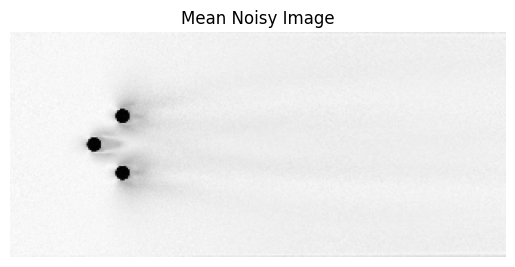

In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)
# Display the mean noisy image using matplotlib.pyplot
plt.imshow(mean_noisy_image, cmap='gray')
plt.title('Mean Noisy Image')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Calculate the mean-subtracted images for the stacked noisy images
mean_subtracted_noisy_images = stacked_noisy_images_array - mean_noisy_image
print(mean_subtracted_noisy_images)
print(mean_subtracted_noisy_images.shape)

[[[  21.3         -29.08947368   27.38947368 ...  -34.12631579
     49.77894737   13.94210526]
  [  -3.66315789  -63.12631579  -23.96842105 ...   40.5
     36.54210526   36.52631579]
  [  16.48421053   24.73157895  -12.14210526 ...   38.84736842
     15.22105263   41.88421053]
  ...
  [  21.86842105  -29.34210526  -14.11052632 ...   26.49473684
     13.94210526   34.72631579]
  [  -8.            3.88421053   33.3        ...  -49.11052632
     42.29473684   49.52105263]
  [ -44.77368421   20.1          38.29473684 ...   -3.62631579
     37.74210526   32.78421053]]

 [[  35.3         -38.08947368   38.38947368 ...   51.87368421
     49.77894737   24.94210526]
  [  37.33684211  -37.12631579   29.03157895 ...    9.5
     -0.45789474   -4.47368421]
  [ -28.51578947  -48.26842105   20.85789474 ...   -5.15263158
     37.22105263  -26.11578947]
  ...
  [  39.86842105   37.65789474   -1.11052632 ...  -32.50526316
     35.94210526  -13.27368421]
  [  33.           24.88421053    8.3        ...  

In [ ]:
# Reshape the mean-subtracted images into a 2D matrix for SVD
num_images, height, width = mean_subtracted_noisy_images.shape
mean_subtracted_noisy_images_2d = mean_subtracted_noisy_images.reshape(num_images, height * width)
# Apply Singular Value Decomposition (SVD)
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(mean_subtracted_noisy_images_2d, full_matrices=False)
# U_noisy: Left singular vectors (eigenmodes) represent the dominant spatial patterns of variation.
# S_noisy: Singular values represent the variance captured by each eigenmode.
# Vt_noisy: Transpose of right singular vectors (not typically used in POD).
# Print the shapes of the matrices
print(U_noisy)
print("U_noisy shape:", U_noisy.shape)
print(S_noisy)
print("S_noisy shape:", S_noisy.shape)
print(Vt_noisy)
print("Vt_noisy shape:", Vt_noisy.shape)

[[-0.08294311  0.01633537 -0.01187423 ...  0.05907747  0.13164226
  -0.07254763]
 [-0.08523302  0.01891084 -0.01769729 ... -0.26892643 -0.19198884
  -0.07254763]
 [-0.09122988  0.02067358 -0.01985886 ...  0.26964779  0.29417103
  -0.07254763]
 ...
 [ 0.03184963  0.04435236  0.01214476 ... -0.01399944 -0.01471389
  -0.07254763]
 [ 0.02758704  0.04437092  0.01214422 ... -0.01649018  0.02497933
  -0.07254763]
 [ 0.0163775   0.04119538  0.01140338 ... -0.02992865  0.01536835
  -0.07254763]]
U_noisy shape: (190, 190)
[1.04690499e+04 8.95278476e+03 8.38179258e+03 8.13653513e+03
 7.88943888e+03 7.65716953e+03 7.60263766e+03 7.32005775e+03
 7.25012736e+03 7.01291530e+03 6.74285387e+03 6.56547161e+03
 6.47247026e+03 6.40777932e+03 6.27439917e+03 6.20069048e+03
 6.15034786e+03 6.11654723e+03 6.06177577e+03 5.98615647e+03
 5.93487388e+03 5.90519594e+03 5.84710641e+03 5.83327920e+03
 5.79206595e+03 5.77125694e+03 5.75339447e+03 5.73264859e+03
 5.71581351e+03 5.70284125e+03 5.68521056e+03 5.6788115

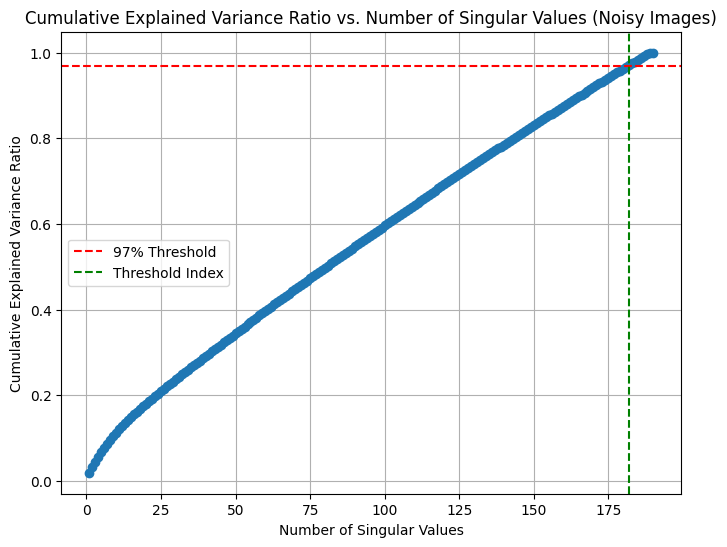

In [ ]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio_noisy = (S_noisy ** 2) / np.sum(S_noisy ** 2)
cumulative_variance_ratio_noisy = np.cumsum(explained_variance_ratio_noisy)
# Find the index where cumulative explained variance ratio exceeds 97%
threshold_index_noisy = np.argmax(cumulative_variance_ratio_noisy >= 0.97) + 1  # Adding 1 to start from 1
# Plot the cumulative explained variance ratio vs. the number of singular values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio_noisy) + 1), cumulative_variance_ratio_noisy, marker='o', linestyle='-')
plt.axhline(y=0.97, color='r', linestyle='--', label='97% Threshold')  # Horizontal line for 97% threshold
plt.axvline(x=threshold_index_noisy, color='g', linestyle='--', label='Threshold Index')  # Vertical line for threshold index
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Singular Values (Noisy Images)')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

### **5. Super-Resolving for Gaussian Noise**

In [ ]:
# Define the desired width and height for the resized images
resize_width = 200
resize_height = 150
# Function to resize and display noisy image using Matplotlib
def display_noisy_image(title, image, ax):
    resized_image = cv2.resize(image, (resize_width, resize_height))
    num_images = resized_image.shape[0] if len(resized_image.shape) == 3 else 1
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(f"{title} ({num_images} images)")
    ax.axis('off')
# Function to apply Gaussian blur to denoise images
def denoise_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)  # Applying Gaussian blur for denoising
# Create subplots for each frame and noise ratio combination
fig, axes = plt.subplots(num_frames, len(noise_ratios), figsize=(20, 15))
# Initialize a count to track the number of iterations
iteration_count = 0
# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx]
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Add Noise
    for j, noise_ratio in enumerate(noise_ratios):
        noisy_frame_gaussian = add_gaussian_noise(gray_frame.copy(), noise_ratio)
        # Apply denoising
        denoised_frame = denoise_image(noisy_frame_gaussian)
        # Display resized noisy frames in separate columns based on noise ratio
        display_noisy_image(f"Denoised Frame {idx+1} - Gaussian Noise Level {noise_ratio * 100}%", denoised_frame, axes[idx, j])
        # Increment the iteration count
        iteration_count += 1
# Print the total number of iterations, which corresponds to the total number of images
print(f"Total number of images: {iteration_count}")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### **4.1. Adding and Pepper Noise**

In [ ]:
def add_salt_and_pepper_noise(image, noise_ratio):
    s_vs_p = 0.5  # Equal proportion of salt and pepper
    out = np.copy(image)
    # Salt noise
    num_salt = int(noise_ratio * image.size * 0.5)  # Assuming 50% salt and pepper
    coords = [np.random.randint(0, dim - 1, int(num_salt)) for dim in image.shape]
    # Limit indices to valid range (assuming desired noise ratio is within image size)
    coords = [np.clip(coord, 0, dim - 1) for coord, dim in zip(coords, image.shape)]  # Clamp to array boundaries
    out[tuple(coords)] = 255
    # Pepper noise
    num_pepper = np.ceil(noise_ratio * image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, dim - 1, int(num_pepper)) for dim in image.shape]
    coords = [np.clip(coord, 0, dim - 1) for coord, dim in zip(coords, image.shape)]  # Clamp to array boundaries
    out[tuple(coords)] = 0
    return out

In [ ]:
# Fix the random seed for consistent noise patterns
np.random.seed(202)
# Define noise ratios for different types of noise
noise_ratios = [0.2, 0.4, 0.6, 0.8]  # Represent 20%, 40%, 60%, and 80%
# Assuming `frames` is your image array
num_frames = 100
# Function to display noisy image (optional)
def display_noisy_image(title, image):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# Print array lengths for debugging
print("Number of frames in code:", num_frames)
print("Actual length of frames array:", len(frames))
# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx]
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Add Noise (separate functions for clarity)
    def add_salt_pepper_noise_frame(frame, noise_ratio):
        noisy_frame = add_salt_and_pepper_noise(frame.copy(), noise_ratio)
        print(noisy_frame)
        print(noisy_frame.shape)
        return noisy_frame
for noise_ratio in noise_ratios:
  noisy_frame_salt_pepper = add_salt_pepper_noise_frame(gray_frame.copy(), noise_ratio)

In [ ]:
# Define the desired width and height for the resized images
resize_width = 200
resize_height = 150
# Function to resize and display noisy image using Matplotlib
def display_noisy_image(title, image, ax):
    resized_image = cv2.resize(image, (resize_width, resize_height))
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(title)
    ax.axis('off')
# Create subplots for each frame and noise ratio combination
fig, axes = plt.subplots(num_frames, len(noise_ratios), figsize=(20, 15))
# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx]
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Add Noise
    for j, noise_ratio in enumerate(noise_ratios):
        noisy_frame_salt_pepper = add_salt_and_pepper_noise(gray_frame.copy(), noise_ratio)
        display_noisy_image(f"Noisy Frame {idx+1} - Salt and Pepper Noise Level {noise_ratio * 100}%", noisy_frame_salt_pepper, axes[idx, j])
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### **4.2. Effect of Salt and Pepper Noise on POD Modes**

In [ ]:
# Define the function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, noise_ratio):
    row, col = image.shape
    salt_pepper = np.random.rand(row, col)
    noisy_image = image.copy()
    # Add salt noise
    noisy_image[salt_pepper < noise_ratio / 2] = 255
    # Add pepper noise
    noisy_image[salt_pepper > 1 - noise_ratio / 2] = 0
    return noisy_image
# Define the preprocessing function
def preprocess_image(frame, resize_factor=0.2):
    # Resize the image
    height, width = frame.shape[:2]
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    resized_frame = cv2.resize(frame, (new_width, new_height))
    # Convert to grayscale if necessary
    if len(resized_frame.shape) == 3:
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = resized_frame
    return gray_frame
# List to store preprocessed noisy frames
stacked_noisy_images = []
# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx].copy()  # Make sure to copy the frame before modifying it
    # Convert to grayscale only if it's not already grayscale
    if len(frame.shape) == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    else:
        gray_frame = frame  # Image is already grayscale
    # Preprocess each noisy frame
    for noise_ratio in noise_ratios:
        # Add salt and pepper noise
        noisy_frame = add_salt_and_pepper_noise(gray_frame, noise_ratio)
        # Preprocess the noisy frame
        preprocessed_noisy_frame = preprocess_image(noisy_frame)
        # Append preprocessed noisy frame to the list
        stacked_noisy_images.append(preprocessed_noisy_frame)
# Convert the list of preprocessed noisy frames into a numpy array
stacked_noisy_images_array = np.array(stacked_noisy_images)
print(stacked_noisy_images_array.shape)

In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)
# Now 'mean_noisy_image' contains the mean image of the stacked noisy images
print("Mean noisy image:", mean_noisy_image)
print("Mean noisy image shape:", mean_noisy_image.shape)

In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)
# Display the mean noisy image using matplotlib.pyplot
plt.imshow(mean_noisy_image, cmap='gray')
plt.title('Mean Noisy Image')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Calculate the mean-subtracted images for the stacked noisy images
mean_subtracted_noisy_images = stacked_noisy_images_array - mean_noisy_image
print(mean_subtracted_noisy_images)
print(mean_subtracted_noisy_images.shape)

In [ ]:
# Reshape the mean-subtracted images into a 2D matrix for SVD
num_images, height, width = mean_subtracted_noisy_images.shape
mean_subtracted_noisy_images_2d = mean_subtracted_noisy_images.reshape(num_images, height * width)
# Apply Singular Value Decomposition (SVD)
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(mean_subtracted_noisy_images_2d, full_matrices=False)
# U_noisy: Left singular vectors (eigenmodes) represent the dominant spatial patterns of variation.
# S_noisy: Singular values represent the variance captured by each eigenmode.
# Vt_noisy: Transpose of right singular vectors (not typically used in POD).
# Print the shapes of the matrices
print(U_noisy)
print("U_noisy shape:", U_noisy.shape)
print(S_noisy)
print("S_noisy shape:", S_noisy.shape)
print(Vt_noisy)
print("Vt_noisy shape:", Vt_noisy.shape)

In [ ]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio_noisy = (S_noisy ** 2) / np.sum(S_noisy ** 2)
cumulative_variance_ratio_noisy = np.cumsum(explained_variance_ratio_noisy)
# Find the index where cumulative explained variance ratio exceeds 97%
threshold_index_noisy = np.argmax(cumulative_variance_ratio_noisy >= 0.97) + 1  # Adding 1 to start from 1
# Plot the cumulative explained variance ratio vs. the number of singular values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio_noisy) + 1), cumulative_variance_ratio_noisy, marker='o', linestyle='-')
plt.axhline(y=0.97, color='r', linestyle='--', label='97% Threshold')  # Horizontal line for 97% threshold
plt.axvline(x=threshold_index_noisy, color='g', linestyle='--', label='Threshold Index')  # Vertical line for threshold index
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Singular Values (Noisy Images)')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

### **5. Super-Resolving for Salt and Pepper Noise**

In [ ]:
# Function to resize and display image using Matplotlib
def display_image(title, image, ax):
    resized_image = cv2.resize(image, (200, 150))
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(title)
    ax.axis('off')
# Function to apply median filter to denoise images with salt and pepper noise
def denoise_salt_and_pepper(image):
    return cv2.medianBlur(image, 3)  # Applying median filter for denoising
# Assuming frames is your image array
num_frames = 100
noise_ratios = [0.2, 0.4, 0.6, 0.8]  # Represent 20%, 40%, 60%, and 80%
# Create subplots for each frame and noise ratio combination
fig, axes = plt.subplots(num_frames, len(noise_ratios), figsize=(20, 15))
# Loop through each frame in the array (up to valid range) for salt and pepper noise
for idx in range(num_frames):
    frame = frames[idx]
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Add Salt and Pepper Noise
    for j, noise_ratio in enumerate(noise_ratios):
        noisy_frame_salt_pepper = add_salt_and_pepper_noise(gray_frame.copy(), noise_ratio)
        # Apply denoising for salt and pepper noise
        denoised_frame_salt_pepper = denoise_salt_and_pepper(noisy_frame_salt_pepper)
        # Display resized denoised frames for salt and pepper noise
        display_image(f"Denoised Frame {idx+1} - Salt and Pepper Noise Level {noise_ratio * 100}%", denoised_frame_salt_pepper, axes[idx, j])
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### **4.1. Adding Speckle Noise**

In [ ]:
def add_speckle_noise(image, noise_ratio):
    mean = 0
    var = (noise_ratio * image.max()) ** 2
    sigma = var**0.5
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + image * gauss
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

In [ ]:
# Fix the random seed for consistent noise patterns
np.random.seed(202)
# Define noise ratios for different types of noise
noise_ratios = [0.2, 0.4, 0.6, 0.8]  # Represent 20%, 40%, 60%, and 80%
# Assuming `frames` is your image array
num_frames = 2
# Function to add speckle noise to a frame
def add_speckle_noise_frame(frame, noise_ratio):
    noisy_frame = add_speckle_noise(frame.copy(), noise_ratio)
    return noisy_frame
# Print array lengths for debugging
print("Number of frames in code:", num_frames)
print("Actual length of frames array:", len(frames))
# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx]
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Apply each noise type with different levels
    for noise_ratio in noise_ratios:
        noisy_frame_speckle = add_speckle_noise_frame(gray_frame.copy(), noise_ratio)
        # Print the noisy frames as needed
        print(noisy_frame_speckle)
        print(noisy_frame_speckle.shape)

In [ ]:
# Define the desired width and height for the resized images
resize_width = 200
resize_height = 150
# Function to resize and display noisy image using Matplotlib
def display_noisy_image(title, image, ax):
    resized_image = cv2.resize(image, (resize_width, resize_height))
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(title)
    ax.axis('off')
# Create subplots for each frame and noise ratio combination
fig, axes = plt.subplots(num_frames, len(noise_ratios), figsize=(20, 15))
# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx]
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Add Noise
    for j, noise_ratio in enumerate(noise_ratios):
        noisy_frame_speckle = add_speckle_noise(gray_frame.copy(), noise_ratio)
        display_noisy_image(f"Noisy Frame {idx+1} - Speckle Noise Level {noise_ratio * 100}%", noisy_frame_speckle, axes[idx, j])
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### **4.2. Effect of Speckle Noise on POD Modes**

In [ ]:
def preprocess_image(frame, resize_factor=0.2):
    # Resize the image
    height, width = frame.shape[:2]
    new_height = int(height * resize_factor)
    new_width = int(width * resize_factor)
    resized_frame = cv2.resize(frame, (new_width, new_height))
    # Convert to grayscale if necessary
    if len(resized_frame.shape) == 3:
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = resized_frame
    return gray_frame
# List to store preprocessed noisy frames
stacked_noisy_images = []
# Loop through each frame in the array (up to valid range)
for idx in range(min(num_frames, len(frames))):
    frame = frames[idx].copy()  # Make sure to copy the frame before modifying it
    # Convert to grayscale only if it's not already grayscale
    if len(frame.shape) == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    else:
        gray_frame = frame  # Image is already grayscale
    # Preprocess each noisy frame
    for noise_ratio in noise_ratios:
        # Add noise
        noisy_frame_speckle = add_speckle_noise_frame(gray_frame, noise_ratio)
        # Preprocess the noisy frame
        preprocessed_noisy_frame = preprocess_image(noisy_frame_speckle)
        # Append preprocessed noisy frame to the list
        stacked_noisy_images.append(preprocessed_noisy_frame)
# Convert the list of preprocessed noisy frames into a numpy array
stacked_noisy_images_array = np.array(stacked_noisy_images)
print("Stacked Noisy Images Array Shape:", stacked_noisy_images_array.shape)

In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)
# Now 'mean_noisy_image' contains the mean image of the stacked noisy images
print("Mean Noisy Image:\n", mean_noisy_image)
print("Mean Noisy Image Shape:", mean_noisy_image.shape)

In [ ]:
# Calculate the mean of the stacked noisy images
mean_noisy_image = np.mean(stacked_noisy_images_array, axis=0)
# Display the mean noisy image using matplotlib.pyplot
plt.imshow(mean_noisy_image, cmap='gray')
plt.title('Mean Noisy Image')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Calculate the mean-subtracted images for the stacked noisy images
mean_subtracted_noisy_images = stacked_noisy_images_array - mean_noisy_image
# Print the mean-subtracted noisy images and their shape
print("Mean-subtracted noisy images:", mean_subtracted_noisy_images)
print("Mean-subtracted noisy images shape:", mean_subtracted_noisy_images.shape)

In [ ]:
# Reshape the mean-subtracted images into a 2D matrix for SVD
num_images, height, width = mean_subtracted_noisy_images.shape
mean_subtracted_noisy_images_2d = mean_subtracted_noisy_images.reshape(num_images, height * width)
# Apply Singular Value Decomposition (SVD)
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(mean_subtracted_noisy_images_2d, full_matrices=False)
# Print the shapes of the matrices
print("U_noisy shape:", U_noisy.shape)
print("S_noisy shape:", S_noisy.shape)
print("Vt_noisy shape:", Vt_noisy.shape)

In [ ]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio_noisy = (S_noisy ** 2) / np.sum(S_noisy ** 2)
cumulative_variance_ratio_noisy = np.cumsum(explained_variance_ratio_noisy)
# Find the index where cumulative explained variance ratio exceeds 97%
threshold_index_noisy = np.argmax(cumulative_variance_ratio_noisy >= 0.97) + 1  # Adding 1 to start from 1
# Plot the cumulative explained variance ratio vs. the number of singular values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio_noisy) + 1), cumulative_variance_ratio_noisy, marker='o', linestyle='-')
plt.axhline(y=0.97, color='r', linestyle='--', label='97% Threshold')  # Horizontal line for 97% threshold
plt.axvline(x=threshold_index_noisy, color='g', linestyle='--', label='Threshold Index')  # Vertical line for threshold index
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Singular Values (Noisy Images)')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

### **5. Super-Resolving for Speckle Noise**

In [ ]:
# Function to resize and display image using Matplotlib
def display_image(title, image, ax):
    resized_image = cv2.resize(image, (200, 150))
    ax.imshow(resized_image, cmap='gray')  # Display grayscale images
    ax.set_title(title)
    ax.axis('off')
# Function to apply median filter to denoise images with speckle noise
def denoise_speckle(image):
    return cv2.medianBlur(image, 3)  # Applying median filter for denoising
# Assuming frames is your image array
num_frames = 2
noise_ratios = [0.2, 0.4, 0.6, 0.8]  # Represent 20%, 40%, 60%, and 80%
# Create subplots for each frame and noise ratio combination
fig, axes = plt.subplots(num_frames, len(noise_ratios), figsize=(20, 15))
# Loop through each frame in the array (up to valid range) for speckle noise
for idx in range(num_frames):
    frame = frames[idx]
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Add Speckle Noise
    for j, noise_ratio in enumerate(noise_ratios):
        noisy_frame_speckle = add_speckle_noise(gray_frame.copy(), noise_ratio)
        # Apply denoising for speckle noise
        denoised_frame_speckle = denoise_speckle(noisy_frame_speckle)
        # Display resized denoised frames for speckle noise
        display_image(f"Denoised Frame {idx+1} - Speckle Noise Level {noise_ratio * 100}%", denoised_frame_speckle, axes[idx, j])
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()